# 🔬 EDA project about Personality change after transplant

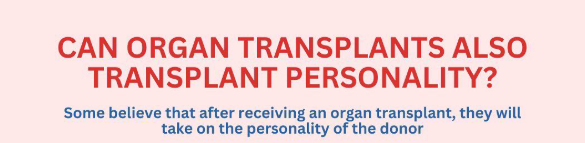

# Mix Simulated + Real Data for Enriched Project

In [23]:
# =============================================================================
# Data Generation & Description
# =============================================================================

# This notebook uses a simulated dataset inspired by the paper:
# "Personality Changes Associated with Organ Transplants"
# by Brian Carter, Laveen Khoshnaw, Megan Simmons, Lisa Hines,
# Brandon Wolfe, and Mitchell Liester.

# The goal was to create a patient-level dataset based on the summary
# tables provided in the study. The dataset includes both demographic
# information and reported personality changes after organ transplants.

# -----------------------------------------------------------------------------
# Dataset Summary:
# -----------------------------------------------------------------------------
# - Total patients: 47
# - Organ types: Heart (23 patients) and Other organs (24 patients)
# - Demographics:
#     - Age (continuous)
#     - Gender (Male/Female)
#     - Ethnicity (Caucasian/Other)
#     - Marital Status (Married/Not Married)
#     - Education (College Graduate/Not)
#     - Retirement status
# - Transplant-related responses:
#     - Heard about personality changes
#     - Feared personality changes
# - Personality changes:
#     - 17 types, including:
#         Physical attributes, Temperament, Emotions, Food, Sports,
#         Physical activities, Personal identity, Movies/TV,
#         Spiritual beliefs, Sexual preferences, Memories, Art,
#         Colors, Electronics, Political views
# - Num_Personality_Changes: Number of reported personality changes
#   excluding physical attributes
#
# -----------------------------------------------------------------------------
# Notes on Data Generation:
# -----------------------------------------------------------------------------
# - The dataset is **simulated at the individual level** using the aggregated
#   summary tables provided in the study.
# - Demographic and transplant-related columns were generated to roughly
#   match the counts from the paper (e.g., number of males, females,
#   college graduates per organ type).
# - Personality changes were randomly assigned based on the reported
#   frequencies in the tables.
# - Physical attributes changes were handled separately due to their
#   high prevalence.
# - This approach combines real published statistics (from the tables)
#   with synthetic sampling to create a realistic, individual-level dataset
#   suitable for exploratory and advanced analyses (e.g., PCA, clustering).

In [2]:
import pandas as pd

# Table 1: Demographics
demographics = [
    {"Organ": "Heart", "Age": 63.2, "Male": 14, "Female": 8, "Caucasian": 18, "Other_Ethnicity": 4,
     "Retired": 15, "Married": 16, "College_Grad": 11, "Heard_Changes": 8, "Feared_Changes": 3, "n": 23},
    {"Organ": "Other", "Age": 60.3, "Male": 10, "Female": 14, "Caucasian": 20, "Other_Ethnicity": 4,
     "Retired": 13, "Married": 14, "College_Grad": 11, "Heard_Changes": 10, "Feared_Changes": 1, "n": 24}
]

# Table 2: Reported personality changes
reported_changes = {
    "Physical_attributes": [19, 13],
    "Temperament": [14, 12],
    "Emotions": [12, 14],
    "Food": [11, 8],
    "Sports": [7, 2],
    "Physical_activities": [6, 7],
    "Personal_identity": [4, 4],
    "Movies_TV": [3, 1],
    "Spiritual_beliefs": [3, 3],
    "Sexual_preferences": [2, 2],
    "Memories": [2, 5],
    "Art": [0, 1],
    "Colors": [0, 0],
    "Electronics": [0, 2],
    "Political_views": [0, 1],
    "Any_Changes": [21, 21]
}

# Table 3: Number of changes per person (excluding physical)
change_distribution = {
    "0": [2, 3],
    "1": [5, 4],
    "2": [3, 6],
    "3": [2, 5],
    "4_or_more": [11, 6]
}

# Generate the simulated individual-level dataset (n=47)
import random
import numpy as np

random.seed(42)
np.random.seed(42)

rows = []

organs = ["Heart"] * 23 + ["Other"] * 24

for idx, organ in enumerate(organs):
    is_heart = organ == "Heart"
    i = 0 if is_heart else 1

    age = np.random.normal(loc=demographics[i]["Age"], scale=5)
    gender = "Male" if idx < demographics[i]["Male"] else "Female"
    ethnicity = "Caucasian" if idx < demographics[i]["Caucasian"] else "Other"
    retired = idx < demographics[i]["Retired"]
    married = idx < demographics[i]["Married"]
    college_grad = idx < demographics[i]["College_Grad"]
    heard_changes = idx < demographics[i]["Heard_Changes"]
    feared_changes = idx < demographics[i]["Feared_Changes"]

    # Randomly assign change categories based on frequencies
    reported = {}
    for key, val in reported_changes.items():
        reported[key] = False

    change_types = [k for k in reported_changes.keys() if k != "Any_Changes"]
    num_changes_dist = list(change_distribution.keys())
    weights = [change_distribution[k][i] for k in num_changes_dist]
    total = sum(weights)
    weights = [w / total for w in weights]

    selected_num = random.choices(num_changes_dist, weights=weights, k=1)[0]
    if selected_num == "0":
        n_changes = 0
    elif selected_num == "4_or_more":
        n_changes = random.randint(4, 6)
    else:
        n_changes = int(selected_num)

    # Exclude physical attribute from count
    selected_changes = random.sample(change_types[1:], n_changes)  # exclude physical
    for ch in selected_changes:
        reported[ch] = True

    # Set physical attribute separately
    reported["Physical_attributes"] = random.random() < (reported_changes["Physical_attributes"][i] / demographics[i]["n"])

    # Build row
    row = {
        "ID": idx + 1,
        "Organ": organ,
        "Age": round(age, 1),
        "Gender": gender,
        "Ethnicity": ethnicity,
        "Retired": retired,
        "Married": married,
        "College_Grad": college_grad,
        "Heard_Changes": heard_changes,
        "Feared_Changes": feared_changes,
        "Num_Personality_Changes": n_changes
    }
    row.update(reported)
    rows.append(row)

df = pd.DataFrame(rows)

In [3]:
df

,ID,Organ,Age,Gender,Ethnicity,Retired,Married,College_Grad,Heard_Changes,Feared_Changes,...,Personal_identity,Movies_TV,Spiritual_beliefs,Sexual_preferences,Memories,Art,Colors,Electronics,Political_views,Any_Changes
0,1,Heart,65.7,Male,Caucasian,True,True,True,True,True,...,False,False,False,False,False,False,True,False,True,False
1,2,Heart,62.5,Male,Caucasian,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
2,3,Heart,66.4,Male,Caucasian,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,4,Heart,70.8,Male,Caucasian,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Heart,62.0,Male,Caucasian,True,True,True,True,False,...,False,False,False,True,False,False,False,False,False,False
5,6,Heart,62.0,Male,Caucasian,True,True,True,True,False,...,False,False,True,False,True,False,False,False,False,False
6,7,Heart,71.1,Male,Caucasian,True,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
7,8,Heart,67.0,Male,Caucasian,True,True,True,True,False,...,False,False,False,False,False,False,False,True,False,False
8,9,Heart,60.9,Male,Caucasian,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,Heart,65.9,Male,Caucasian,True,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False


# STEP 1: Load and Inspect the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       47 non-null     int64  
 1   Organ                    47 non-null     object 
 2   Age                      47 non-null     float64
 3   Gender                   47 non-null     object 
 4   Ethnicity                47 non-null     object 
 5   Retired                  47 non-null     bool   
 6   Married                  47 non-null     bool   
 7   College_Grad             47 non-null     bool   
 8   Heard_Changes            47 non-null     bool   
 9   Feared_Changes           47 non-null     bool   
 10  Num_Personality_Changes  47 non-null     int64  
 11  Physical_attributes      47 non-null     bool   
 12  Temperament              47 non-null     bool   
 13  Emotions                 47 non-null     bool   
 14  Food                     47 

In [5]:
df.describe()

,ID,Age,Num_Personality_Changes
count,47.000000,47.000000,47.000000
mean,24.000000,60.557447,2.638298
std,13.711309,5.002162,1.869963
min,1.000000,50.500000,0.000000
25%,12.500000,57.300000,1.000000
50%,24.000000,60.900000,3.000000
75%,35.500000,63.750000,4.000000
max,47.000000,71.100000,6.000000


In [8]:
df.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,count
ID,Organ,Age,Gender,Ethnicity,Retired,Married,College_Grad,Heard_Changes,Feared_Changes,Num_Personality_Changes,Physical_attributes,Temperament,Emotions,Food,Sports,Physical_activities,Personal_identity,Movies_TV,Spiritual_beliefs,Sexual_preferences,Memories,Art,Colors,Electronics,Political_views,Any_Changes,
1,Heart,65.7,Male,Caucasian,True,True,True,True,True,4,True,False,False,False,True,True,False,False,False,False,False,False,True,False,True,False,1
2,Heart,62.5,Male,Caucasian,True,True,True,True,True,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1
3,Heart,66.4,Male,Caucasian,True,True,True,True,True,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
4,Heart,70.8,Male,Caucasian,True,True,True,True,False,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
5,Heart,62.0,Male,Caucasian,True,True,True,True,False,3,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,1
6,Heart,62.0,Male,Caucasian,True,True,True,True,False,5,True,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,1
7,Heart,71.1,Male,Caucasian,True,True,True,True,False,1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1
8,Heart,67.0,Male,Caucasian,True,True,True,True,False,1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
9,Heart,60.9,Male,Caucasian,True,True,True,False,False,1,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1


# STEP 2: Demographic Breakdown

## Age Distribution

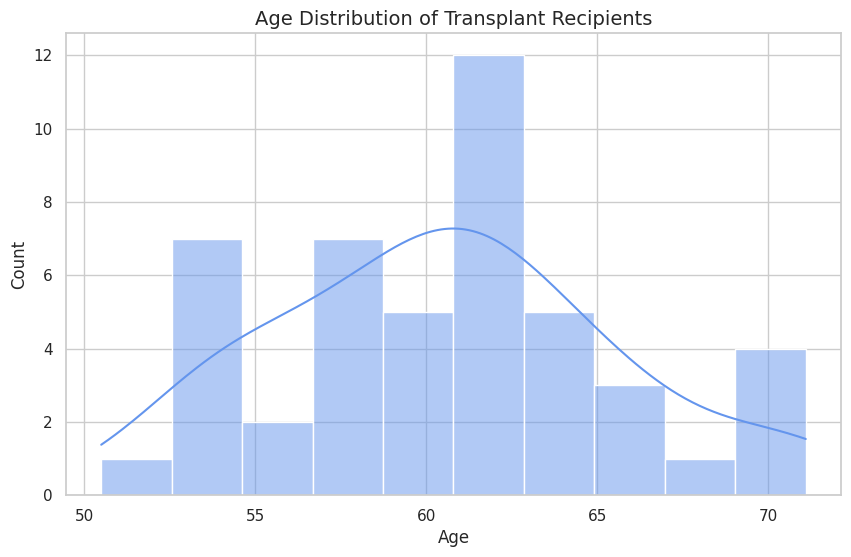

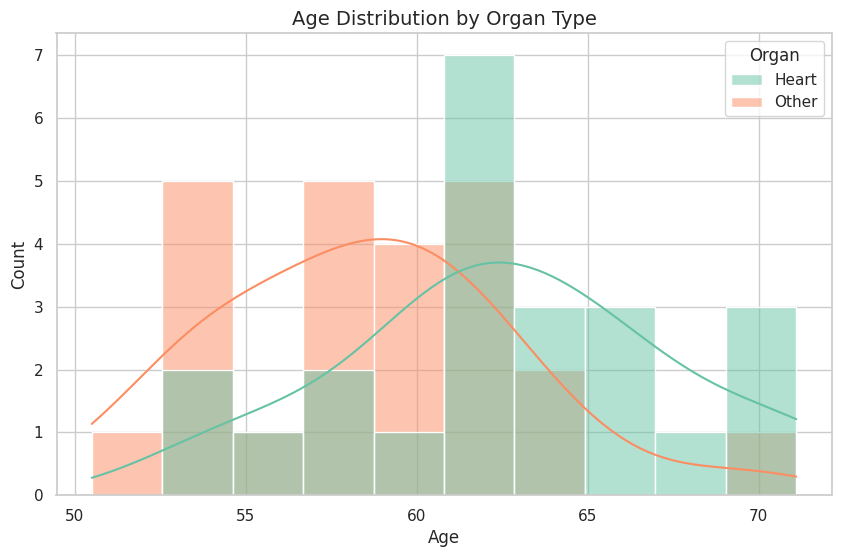

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# A1. Overall age distribution
plt.figure()
sns.histplot(df["Age"], kde=True, bins=10, color='cornflowerblue')
plt.title("Age Distribution of Transplant Recipients", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# A2. Age distribution by organ
plt.figure()
sns.histplot(data=df, x="Age", hue="Organ", kde=True, bins=10, palette="Set2")
plt.title("Age Distribution by Organ Type", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Gender and Ethnicity by Organ

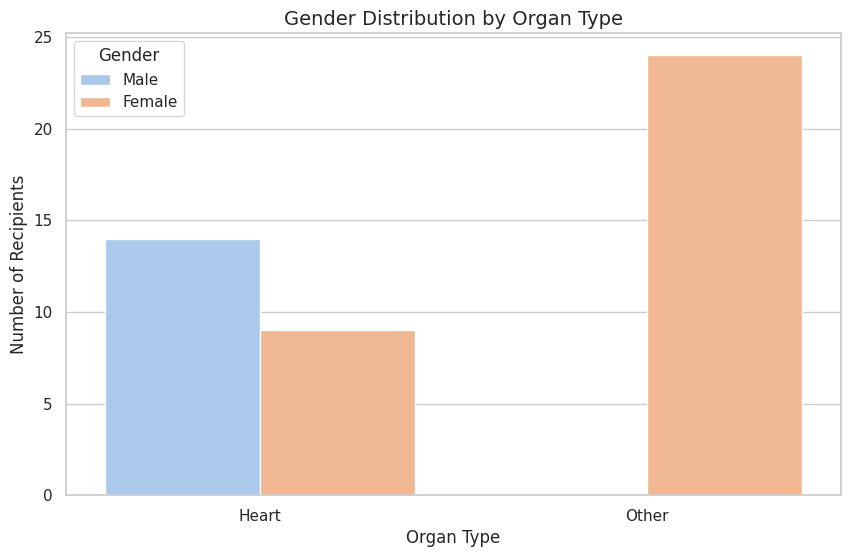

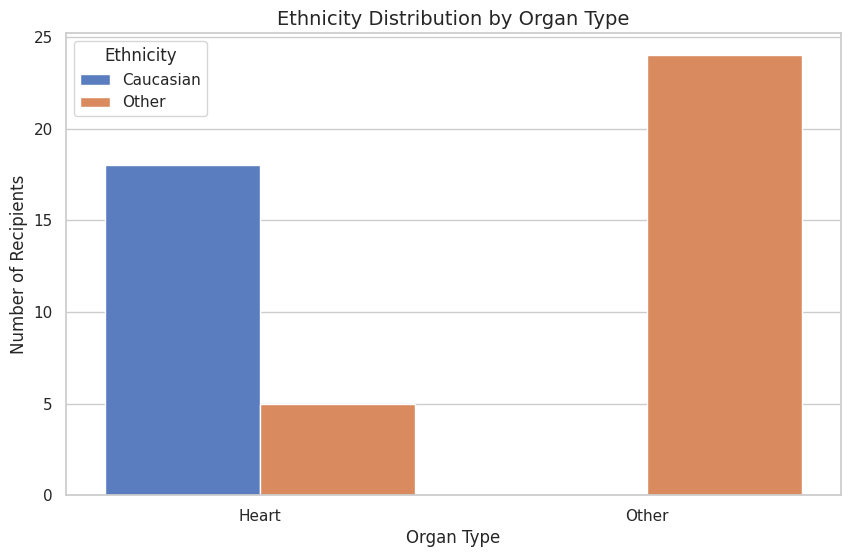

In [10]:
# B1. Gender distribution by organ
plt.figure()
sns.countplot(data=df, x="Organ", hue="Gender", palette="pastel")
plt.title("Gender Distribution by Organ Type", fontsize=14)
plt.xlabel("Organ Type")
plt.ylabel("Number of Recipients")
plt.legend(title="Gender")
plt.show()

# B2. Ethnicity distribution by organ
plt.figure()
sns.countplot(data=df, x="Organ", hue="Ethnicity", palette="muted")
plt.title("Ethnicity Distribution by Organ Type", fontsize=14)
plt.xlabel("Organ Type")
plt.ylabel("Number of Recipients")
plt.legend(title="Ethnicity")
plt.show()


## Education & Marital Status by Organ

/tmp/ipython-input-3203730175.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=college_prop, x="Organ", y="College_Grad", palette="Blues_d")


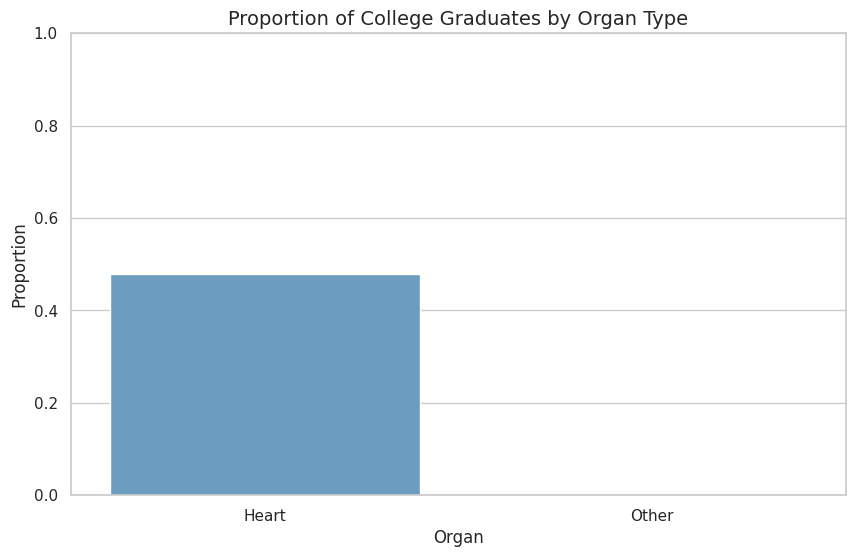

/tmp/ipython-input-3203730175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=married_prop, x="Organ", y="Married", palette="Greens_d")


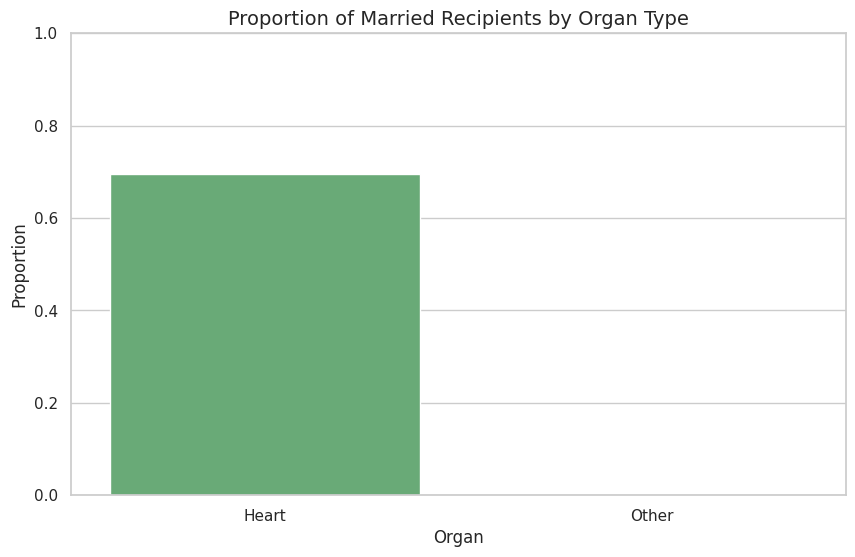

In [11]:
# C1. Proportion of college graduates by organ
college_prop = df.groupby("Organ")["College_Grad"].mean().reset_index()

plt.figure()
sns.barplot(data=college_prop, x="Organ", y="College_Grad", palette="Blues_d")
plt.title("Proportion of College Graduates by Organ Type", fontsize=14)
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.show()

# C2. Proportion of married recipients by organ
married_prop = df.groupby("Organ")["Married"].mean().reset_index()

plt.figure()
sns.barplot(data=married_prop, x="Organ", y="Married", palette="Greens_d")
plt.title("Proportion of Married Recipients by Organ Type", fontsize=14)
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.show()

# Step 3: Awareness & Fear of Personality

## Proportion of Patients Who Heard About Personality Change

/tmp/ipython-input-2418254376.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-2418254376.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


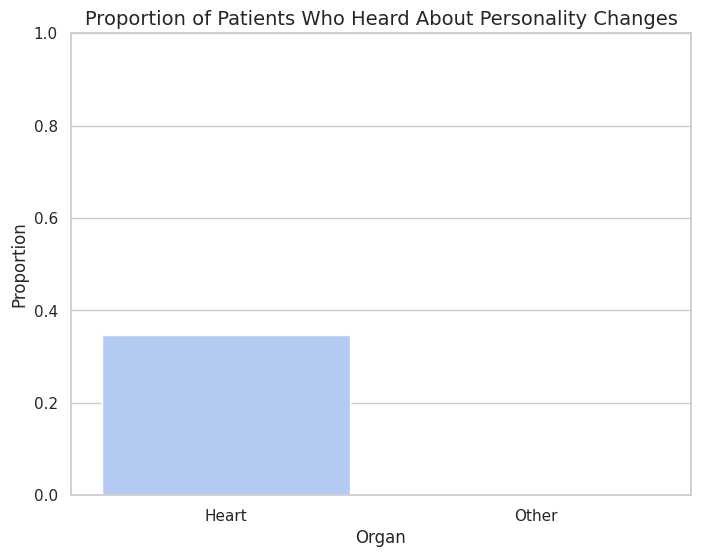

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x="Organ",
    y="Heard_Changes",
    estimator=lambda x: sum(x) / len(x),
    ci=None,
    palette="coolwarm"
)
plt.title("Proportion of Patients Who Heard About Personality Changes", fontsize=14)
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.show()

## Proportion of Patients Who Feared Personality Change

/tmp/ipython-input-3505346120.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-3505346120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


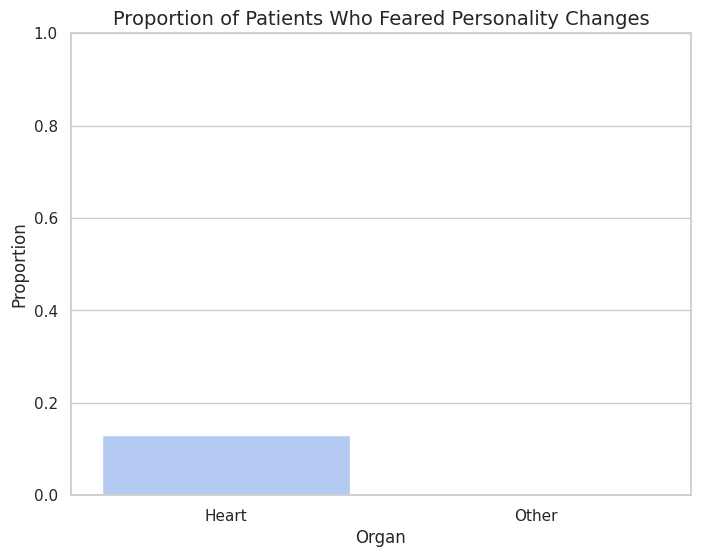

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x="Organ",
    y="Feared_Changes",
    estimator=lambda x: sum(x) / len(x),
    ci=None,
    palette="coolwarm"
)
plt.title("Proportion of Patients Who Feared Personality Changes", fontsize=14)
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.show()


## Cross Analysis: Awareness vs. Fear (Heatmap)

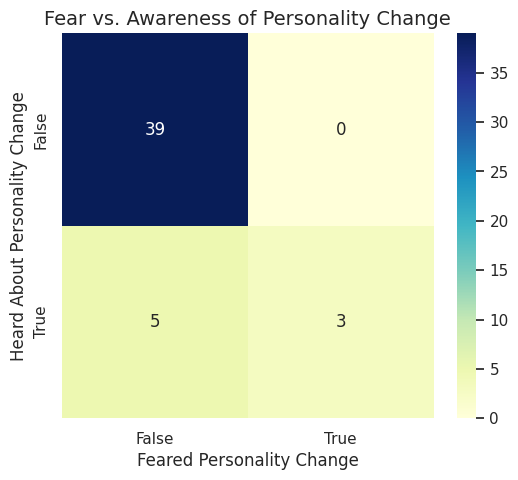

In [14]:
cross_tab = pd.crosstab(df["Heard_Changes"], df["Feared_Changes"])

plt.figure(figsize=(6, 5))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Fear vs. Awareness of Personality Change", fontsize=14)
plt.xlabel("Feared Personality Change")
plt.ylabel("Heard About Personality Change")
plt.show()

>Patients who were aware of potential personality changes are more likely to **fear** them.


>Despite relatively high awareness, fear remains **low** overall.


>This pattern may vary slightly by **organ type**.

# Step 4: Number of Personality Changes (excluding physical)

## Histogram of Number of Personality Changes

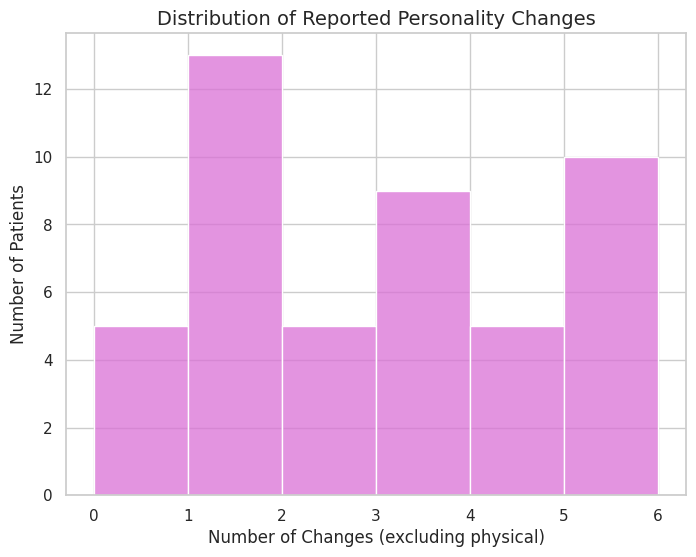

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df["Num_Personality_Changes"], bins=6, kde=False, color="orchid")
plt.title("Distribution of Reported Personality Changes", fontsize=14)
plt.xlabel("Number of Changes (excluding physical)")
plt.ylabel("Number of Patients")
plt.xticks(range(0, df["Num_Personality_Changes"].max() + 1))
plt.show()

## Boxplot: Number of Changes by Organ Type

/tmp/ipython-input-1444144642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Organ", y="Num_Personality_Changes", palette="pastel")


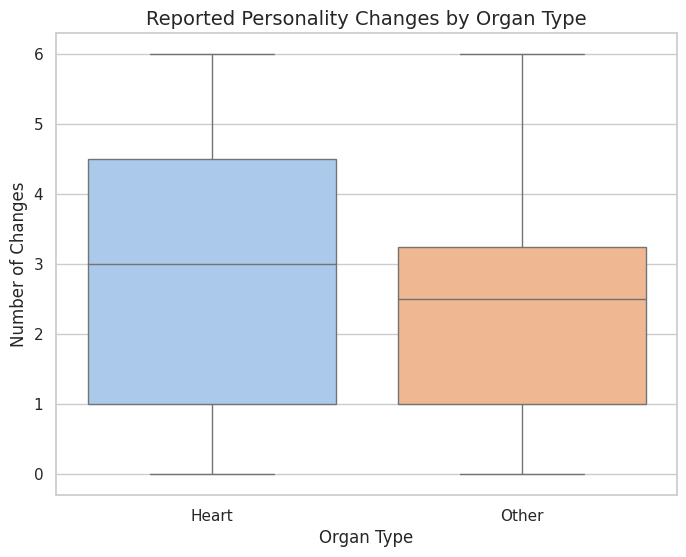

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Organ", y="Num_Personality_Changes", palette="pastel")
plt.title("Reported Personality Changes by Organ Type", fontsize=14)
plt.ylabel("Number of Changes")
plt.xlabel("Organ Type")
plt.show()

## Violin Plot (more visual appeal)

/tmp/ipython-input-1594701750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Organ", y="Num_Personality_Changes", palette="Set2", inner="box")


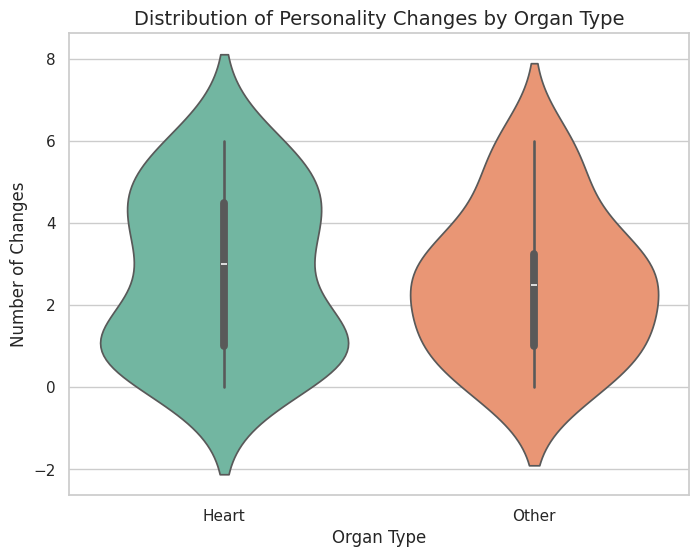

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="Organ", y="Num_Personality_Changes", palette="Set2", inner="box")
plt.title("Distribution of Personality Changes by Organ Type", fontsize=14)
plt.ylabel("Number of Changes")
plt.xlabel("Organ Type")
plt.show()

# Step 5: Most Common Types of Personality Changes

## Frequency of All Change Types (Bar Chart)

/tmp/ipython-input-357593260.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=change_counts.values, y=change_counts.index, palette="mako")


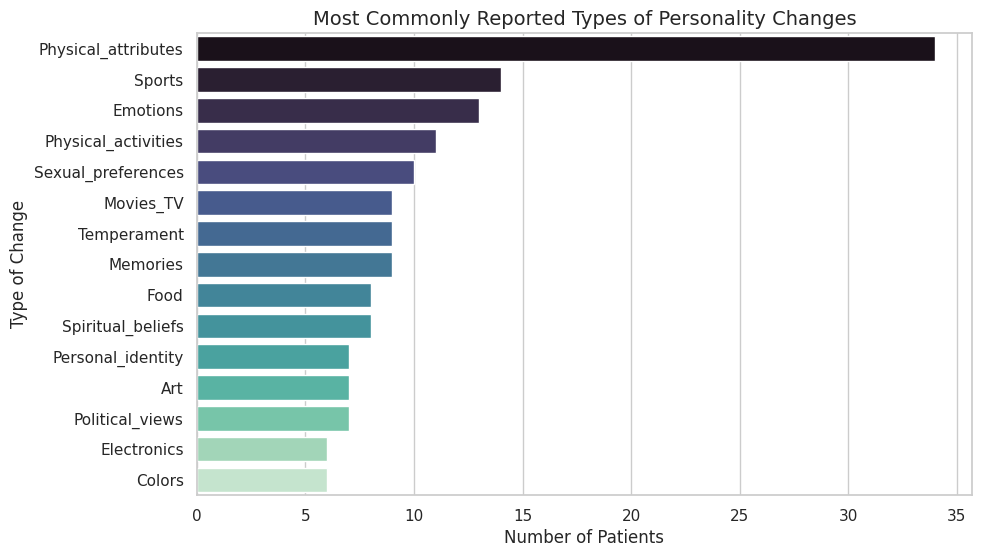

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of change types (excluding metadata columns)
change_columns = [
    "Temperament", "Emotions", "Food", "Sports", "Physical_activities",
    "Personal_identity", "Movies_TV", "Spiritual_beliefs", "Sexual_preferences",
    "Memories", "Art", "Colors", "Electronics", "Political_views",
    "Physical_attributes"  # include it or exclude depending on focus
]

# Calculate the number of patients who reported each change
change_counts = df[change_columns].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=change_counts.values, y=change_counts.index, palette="mako")
plt.title("Most Commonly Reported Types of Personality Changes", fontsize=14)
plt.xlabel("Number of Patients")
plt.ylabel("Type of Change")
plt.show()

## Top Change Types by Organ

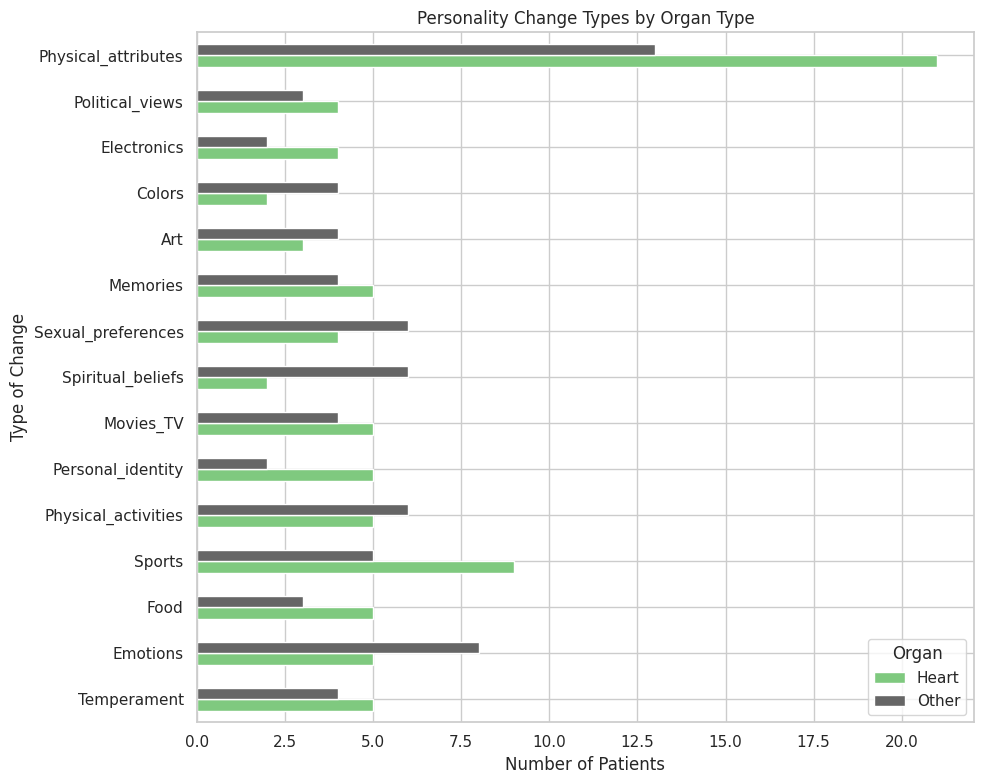

In [19]:
# Sum by organ group
by_organ = df.groupby("Organ")[change_columns].sum().T

# Plot side-by-side comparison
by_organ.plot(kind="barh", figsize=(10, 8), colormap="Accent")
plt.title("Personality Change Types by Organ Type")
plt.xlabel("Number of Patients")
plt.ylabel("Type of Change")
plt.legend(title="Organ")
plt.tight_layout()
plt.show()

# Advanced analysis (PCA, clustering)

## Data preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler

# Colonnes à inclure dans l'analyse
binary_cols = [
    'Gender', 'Ethnicity', 'Retired', 'Married', 'College_Grad', 'Heard_Changes', 'Feared_Changes',
    'Physical_attributes', 'Temperament', 'Emotions', 'Food', 'Sports', 'Physical_activities',
    'Personal_identity', 'Movies_TV', 'Spiritual_beliefs', 'Sexual_preferences', 'Memories',
    'Art', 'Colors', 'Electronics', 'Political_views'
]

# Convertir les variables binaires en 0/1
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0})
df_encoded['Ethnicity'] = df_encoded['Ethnicity'].map({'Caucasian': 1, 'Other': 0})

for col in binary_cols[5:]:  # True/False -> 1/0
    df_encoded[col] = df_encoded[col].astype(int)

# Colonnes numériques continues
numeric_cols = ['Age', 'Num_Personality_Changes']

# Combiner toutes pour l'analyse
features = numeric_cols + binary_cols
X = df_encoded[features]

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA (Principal Component Analysis)

Variance expliquée par les 2 composantes: [0.243995   0.14057915]


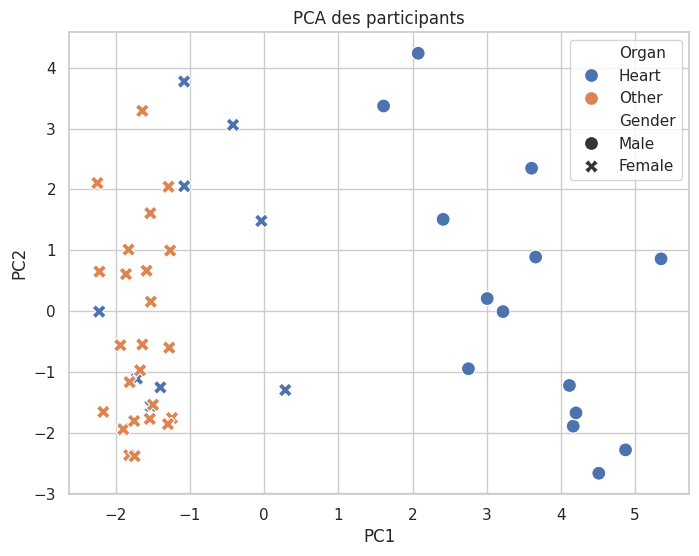

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajouter les composantes au DataFrame pour visualisation
df_pca = df.copy()
df_pca['PC1'] = X_pca[:,0]
df_pca['PC2'] = X_pca[:,1]

# Variance expliquée
print("Variance expliquée par les 2 composantes:", pca.explained_variance_ratio_)

# Visualisation
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Organ', style='Gender', s=100)
plt.title("PCA des participants")
plt.show()


## Clustering (K-Means)

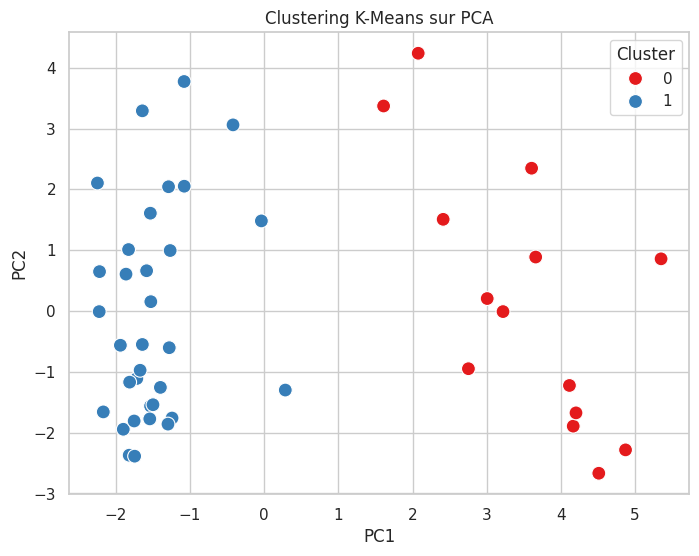

In [22]:
from sklearn.cluster import KMeans

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajouter cluster au DataFrame
df_pca['Cluster'] = clusters

# Visualisation des clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.title("Clustering K-Means sur PCA")
plt.show()